Index(['Personel Number', 'Sex', 'Age', 'Marital Status', 'Education Level',
       'Department', 'Number of Assistants', 'Experience', 'Marketing Budget',
       'Appraisal Score', 'Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'],
      dtype='object')


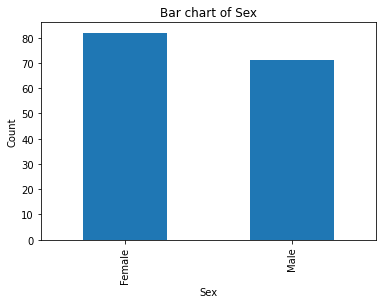

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_excel('data.xlsx')

print(data.columns)

# A bar chart of Sex
sex = data['Sex'].value_counts()
sex.plot(kind='bar')
plt.title('Bar chart of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

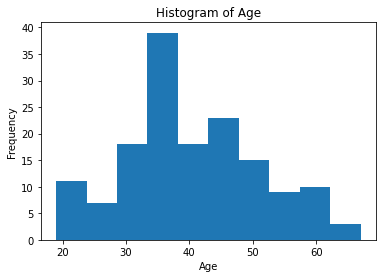

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('data.xlsx')

# A histogram of Age
age = data['Age']
age.plot(kind='hist')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

In [9]:
#importing the data
data = pd.read_excel('data.xlsx')

#printing summary statistics for the numerical columns in our data
summary_stats = data.describe()
print(summary_stats)

              Age  Number of Assistants  Experience  Marketing Budget  \
count  153.000000            153.000000  153.000000        153.000000   
mean    40.150327             12.385621   10.751634          1.426340   
std     10.792768              7.277511    5.957394          0.889184   
min     19.000000              2.000000    1.000000          0.170000   
25%     34.000000              6.000000    6.000000          0.640000   
50%     39.000000             12.000000   10.000000          1.290000   
75%     47.000000             18.000000   15.000000          2.000000   
max     67.000000             31.000000   25.000000          4.600000   

       Appraisal Score   Quarter 1   Quarter 2   Quarter 3   Quarter 4  
count       153.000000  153.000000  153.000000  153.000000  153.000000  
mean         80.636601   18.563595   19.643856   21.874967   22.117059  
std           8.355181    4.677800    4.807961    4.916638    5.292673  
min          66.200000    8.570000    9.140000   1

In [14]:
from scipy.stats import chi2_contingency
import pandas as pd

# load the data
data = pd.read_excel('data.xlsx')

# create the contingency table
contingency_table = pd.crosstab(data['Department'], data['Sex'], margins=True)

# perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# display the results
print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)

Chi-square statistic: 3.3384798815063323
P-value: 0.9926458209580624
Degrees of freedom: 12


In [19]:
#Testing significance in relationship between marital status and education level
from scipy.stats import chi2_contingency
import pandas as pd

# load the data
data = pd.read_excel('data.xlsx')

# create the contingency table
contingency_table = pd.crosstab(data['Marital Status'], data['Education Level'])

print(contingency_table)

# perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# display the results
print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:\n', expected)

Education Level  Bachelors  Certificate  Diploma  Post graduate
Marital Status                                                 
Divorced                 7            6       11              8
Married                 10           23       13             22
Single                  13            6        7              4
Widowed                  9            2        6              6
Chi-square statistic: 19.236160625508447
P-value: 0.023258092987928462
Degrees of freedom: 9
Expected frequencies:
 [[ 8.15686275  7.73856209  7.73856209  8.36601307]
 [17.33333333 16.44444444 16.44444444 17.77777778]
 [ 7.64705882  7.25490196  7.25490196  7.84313725]
 [ 5.8627451   5.5620915   5.5620915   6.0130719 ]]


In [24]:
# Testing significance in relationship between education level and department
# Fisher's exact test
import pandas as pd
from scipy.stats import contingency

# load the data
data = pd.read_excel('data.xlsx')

# create a contingency table
contingency_table = pd.crosstab(data['Education Level'], data['Department'])

print(contingency_table)

# perform the Fisher's exact test
g, p, dof, expected = contingency.chi2_contingency(contingency_table, lambda_="log-likelihood")

# print the results
print('Fishers statistic:', g)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:\n', expected)

Department       Agriculture  Energy  Financial services  Manufacturing  \
Education Level                                                           
Bachelors                  6       6                   1              6   
Certificate               11       2                   8              6   
Diploma                    8       4                   6              4   
Post graduate              8       3                  12              5   

Department       Mining  Tourism  
Education Level                   
Bachelors             7       13  
Certificate           4        6  
Diploma               9        6  
Post graduate         7        5  
Fishers statistic: 22.387556486751492
P-value: 0.09803731044292098
Degrees of freedom: 15
Expected frequencies:
 [[8.41176471 3.82352941 6.88235294 5.35294118 6.88235294 7.64705882]
 [7.98039216 3.62745098 6.52941176 5.07843137 6.52941176 7.25490196]
 [7.98039216 3.62745098 6.52941176 5.07843137 6.52941176 7.25490196]
 [8.62745098 3.9215

In [24]:
from scipy.stats import f_oneway
import pandas as pd

#load the data
data = pd.read_excel('data.xlsx')

data['Age Category'] = pd.cut(data['Age'], bins=[0, 35, float('inf')], labels=['Young', 'Old'])
grouped_data = data.groupby(['Sex', 'Age Category', 'Marital Status', 'Education Level', 'Department']).agg({'Quarter 1': 'mean', 'Quarter 2': 'mean', 'Quarter 3': 'mean', 'Quarter 4': 'mean', 'Marketing Budget': 'sum'})

q1_groups = [data[data['Quarter 1'] == i]['Marketing Budget']
             for i in data['Quarter 1'].unique()]

f_stat, p_value = f_oneway(*q1_groups)
if p_value < 0.05:
    print('The p_value, ', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the first quarter.')
else:
    print('The p_value, ', p_value,',is greater than 0.05. We therefore conclude there is no significant difference in sales for the first quarter.')

q2_groups = [data[data['Quarter 2'] == i]['Marketing Budget']
                for i in data['Quarter 2'].unique()]

f_stat, p_value = f_oneway(*q2_groups)
if p_value < 0.05:
    print('The p_value, ', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the second quarter.')
else:
    print('The p_value, ', p_value,',is greater than 0.05. We therefore conclude there is no significant difference in sales for the second quarter.')

q3_groups = [data[data['Quarter 3'] == i]['Marketing Budget']
                for i in data['Quarter 3'].unique()]

f_stat, p_value = f_oneway(*q3_groups)
if p_value < 0.05:
    print('The p_value, ', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the third quarter.')
else:
    print('The p_value, ', p_value,',is greater than 0.05. We therefore conclude there is no significant difference in sales for the third quarter.')

q4_groups = [data[data['Quarter 4'] == i]['Marketing Budget']
                for i in data['Quarter 4'].unique()]

f_stat, p_value = f_oneway(*q4_groups)
if p_value < 0.05:
    print('The p_value, ', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the fourth quarter.')
else:
    print('The p_value, ', p_value,',is greater than 0.05. We therefore conclude there is no significant difference in sales for the fourth quarter.')


The p_value,  0.14533074190120873 ,is greater than 0.05. We therefore conclude there is no significant difference in sales for the first quarter.
The p_value,  0.6042517511420767 ,is greater than 0.05. We therefore conclude there is no significant difference in sales for the second quarter.
The p_value,  0.002498933732830875 , is less than 0.05. We therefore conclude there is a significant difference in sales for the third quarter.
The p_value,  0.3481018139917928 ,is greater than 0.05. We therefore conclude there is no significant difference in sales for the fourth quarter.


In [26]:
from scipy.stats import kruskal
import pandas as pd

#load the data
data = pd.read_excel('data.xlsx')

data['Age Category'] = pd.cut(data['Age'], bins=[0, 35, float('inf')], labels=['Young', 'Old'])
grouped_data = data.groupby(['Sex', 'Age Category', 'Marital Status', 'Education Level', 'Department']).agg({'Quarter 1': 'mean', 'Quarter 2': 'mean', 'Quarter 3': 'mean', 'Quarter 4': 'mean', 'Marketing Budget': 'sum'})

q1_groups = [data[data['Quarter 1'] == i]['Marketing Budget']
             for i in data['Quarter 1'].unique()]

H_stat, p_value = kruskal(*q1_groups)
if p_value < 0.05:
    print('The p_value,', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the first quarter.')
else:
    print('The p_value,', p_value,', is greater than 0.05. We therefore conclude there is no significant difference in sales for the first quarter.')

q2_groups = [data[data['Quarter 2'] == i]['Marketing Budget']
                for i in data['Quarter 2'].unique()]

H_stat, p_value = kruskal(*q2_groups)
if p_value < 0.05:
    print('The p_value,', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the second quarter.')
else:
    print('The p_value,', p_value,', is greater than 0.05. We therefore conclude there is no significant difference in sales for the second quarter.')

q3_groups = [data[data['Quarter 3'] == i]['Marketing Budget']
                for i in data['Quarter 3'].unique()]
        
H_stat, p_value = kruskal(*q3_groups)
if p_value < 0.05:
    print('The p_value,', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the third quarter.')
else:
    print('The p_value,', p_value,', is greater than 0.05. We therefore conclude there is no significant difference in sales for the third quarter.')

q4_groups = [data[data['Quarter 4'] == i]['Marketing Budget']
                for i in data['Quarter 4'].unique()]
    
H_stat, p_value = kruskal(*q4_groups)
if p_value < 0.05:
    print('The p_value,', p_value,', is less than 0.05. We therefore conclude there is a significant difference in sales for the fourth quarter.')
else:
    print('The p_value,', p_value,', is greater than 0.05. We therefore conclude there is no significant difference in sales for the fourth quarter.')

The p_value, 0.4304069699122757 , is greater than 0.05. We therefore conclude there is no significant difference in sales for the first quarter.
The p_value, 0.5159566526492723 , is greater than 0.05. We therefore conclude there is no significant difference in sales for the second quarter.
The p_value, 0.34161987057427795 , is greater than 0.05. We therefore conclude there is no significant difference in sales for the third quarter.
The p_value, 0.41822880735387274 , is greater than 0.05. We therefore conclude there is no significant difference in sales for the fourth quarter.


In [33]:
import statsmodels.api as sm
import pandas as pd

# Load the data
data = pd.read_excel('data.xlsx')

# Create the X and y matrices for the quarterly sales model
X_q = data[['Age', 'Number of Assistants', 'Experience', 'Marketing Budget', 'Appraisal Score']]
y_q = data[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']]
y_q_sum = y_q.sum(axis=1)

# Add a constant column to X for the intercept
X_q = sm.add_constant(X_q)

# Fit the quarterly sales model
model_q = sm.OLS(y_q_sum, X_q).fit()

# Print the summary of the quarterly sales model
#print(model_q.summary())

# Create the X and y matrices for the annual sales model
X_a = data[['Age', 'Number of Assistants', 'Experience', 'Marketing Budget', 'Appraisal Score']]
y_a = data[['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4']].sum(axis=1)

# Add a constant column to X for the intercept
X_a = sm.add_constant(X_a)

# Fit the annual sales model
model_a = sm.OLS(y_a, X_a).fit()

# Print the summary of the annual sales model
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     23.15
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.19e-17
Time:                        11:32:06   Log-Likelihood:                -598.13
No. Observations:                 153   AIC:                             1208.
Df Residuals:                     147   BIC:                             1226.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   26.2620 

In [3]:
import pandas as pd

data1 = [58.2, 57.2, 43.7, 72.1, 41.9, 45.2, 52.7, 38.2, 52.3, 41.1]
data2 = [58.2, 57.2, 43.7, 72.1, 41.9, 45.2, 52.7, 38.2, 52.3, 41.1]

# Create a pandas DataFrame from the data
df = pd.DataFrame(data1, data2, columns=['values', 'data2'])
print(df)

# Calculate the sample variance using the var() method
variance = df['values'].var(ddof=1)

print(variance)

ValueError: Shape of passed values is (10, 1), indices imply (10, 2)